# Predicting V1 Activity Using a Convolutional (Encoding) Autoencoder

In [1]:
# Importing the necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras import layers, models, losses, optimizers
import os
from tensorflow.keras.models import Model
import time
import datetime
np.random.seed(42)
tf.random.set_seed(45)
from IPython import display
import random
import keras
from keras import ops
from tensorflow.keras import backend as K
from tensorflow.keras import metrics

### Preparing the Data

In [2]:
data_path = "data/"
data1 = sio.loadmat(data_path+'01mean50ms_smallim_d2_crop.mat')
data2 = sio.loadmat(data_path+'02mean50ms_smallim_d2_crop.mat')
data3 = sio.loadmat(data_path+'03mean50ms_smallim_d2_crop.mat')
data4 = sio.loadmat(data_path+'04mean50ms_smallim_d2_crop.mat')
data5 = sio.loadmat(data_path+'05mean50ms_smallim_d2_crop.mat')
data6 = sio.loadmat(data_path+'06mean50ms_smallim_d2_crop.mat')
data7 = sio.loadmat(data_path+'07mean50ms_smallim_d2_crop.mat')
data8 = sio.loadmat(data_path+'08mean50ms_smallim_d2_crop.mat')
data9 = sio.loadmat(data_path+'09mean50ms_smallim_d2_crop.mat')
data10 = sio.loadmat(data_path+'10mean50ms_smallim_d2_crop.mat')

In [3]:
def concat(data_list):
    """
    Function to bundle all the data from the first 9 experimental sessions into a single
    dictionary. The shape of the activations matrix will be (270,355)
    """
    images = data_list[0]["images"]
    activations = []
    n_neurons = [elt["activity"].shape[1] for elt in data_list]
    # Adding empty lists to the initial activation list
    for i in range(270):
        activations.append([])
    for data in data_list:
        for i in range(270):
            activations[i].extend(list(data["activity"][i]))
    activity = np.array(activations)
    return dict({"images":images, "activity":activity, "neurons":n_neurons})

In [4]:
data_list = [data1, data3, data4, data5, data6, data7, data8, data9, data10]
data = concat(data_list)
data["activity"].shape

(270, 355)

In [5]:
#X = data["images"] [:, 1:, 1:]/255.0

X1 = data1['images'][:, 1:, 1:]/255.0
y1 = data1['activity']
l = []
for vct in y1:
  l.append(vct/np.max(vct))
#y1 = np.array(l)
#y1 = (y1-np.min(y1))/(np.max(y1)-np.min(y1))
#y1 = np.random.rand(270, 1024)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.2, random_state=42)

X2 = data2['images'][:, 1:, 1:]/255.0
y2 = data2['activity']
l = []
for vct in y2:
  l.append(vct/np.max(vct))
#y2 = np.array(l)
#y2 = (y2-np.min(y2))/(np.max(y2)-np.min(y2))
#y2 = np.random.rand(270, 1024)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2, random_state=42)

X3 = data3['images'][:, 1:, 1:]/255.0
y3 = data3['activity']
l = []
for vct in y3:
  l.append(vct/np.max(vct))
#y2 = np.array(l)
#y2 = (y2-np.min(y2))/(np.max(y2)-np.min(y2))
#y2 = np.random.rand(270, 1024)a
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.2, random_state=42)

X4 = data4['images'][:, 1:, 1:]/255.0
y4 = data4['activity']
l = []
for vct in y4:
  l.append(vct/np.max(vct))
#y2 = np.array(l)
#y2 = (y2-np.min(y2))/(np.max(y2)-np.min(y2))
#y2 = np.random.rand(270, 1024)a
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.2, random_state=42)

X5 = data5['images'][:, 1:, 1:]/255.0
y5 = data5['activity']
l = []
for vct in y5:
  l.append(vct/np.max(vct))
#y2 = np.array(l)
#y2 = (y2-np.min(y2))/(np.max(y2)-np.min(y2))
#y2 = np.random.rand(270, 1024)a
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.2, random_state=42)

X6 = data6['images'][:, 1:, 1:]/255.0
y6 = data6['activity']
l = []
for vct in y6:
  l.append(vct/np.max(vct))
#y2 = np.array(l)
#y2 = (y2-np.min(y2))/(np.max(y2)-np.min(y2))
#y2 = np.random.rand(270, 1024)a
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6,test_size=0.2, random_state=42)

X7 = data7['images'][:, 1:, 1:]/255.0
y7 = data7['activity']
l = []
for vct in y7:
  l.append(vct/np.max(vct))
#y7 = np.array(l)
#y7 = (y7-np.min(y7))/(np.max(y7)-np.min(y7))
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7,y7,test_size=0.2, random_state=42)

X8 = data8['images'][:, 1:, 1:]/255.0
y8 = data8['activity']
l = []
for vct in y8:
  l.append(vct/np.max(vct))
#y7 = np.array(l)
#y7 = (y7-np.min(y7))/(np.max(y7)-np.min(y7))
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8,y8,test_size=0.2, random_state=42)

X9 = data9['images'][:, 1:, 1:]/255.0
y9 = data9['activity']
l = []
for vct in y9:
  l.append(vct/np.max(vct))
#y7 = np.array(l)
#y7 = (y7-np.min(y7))/(np.max(y7)-np.min(y7))
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9,y9,test_size=0.2, random_state=42)

X10 = data10["images"] [:, 1:, 1:]/255.0
y10 = data10["activity"]
l = []
for vct in y10:
  l.append(vct/np.max(vct))
#y10 = np.array(l)
X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10,test_size=0.2, random_state=42)

X = data["images"] [:, 1:, 1:]/255.0
y = data["activity"]
l = []
for vct in y:
  l.append(vct/np.max(vct))
#y = np.array(l)

# Generate shuffled indices
shuffled_indices = np.random.permutation(len(X))

# Shuffle both X and y using the shuffled indices
X_shuffled = X[shuffled_indices]
y_shuffled = y[shuffled_indices]
X = X_shuffled
y = y_shuffled

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

### Defining the Encoding and Decoding functions

In [6]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def logit(x):
  if 0<x<1:
    return np.log(x/(1-x))
  else:
    return 0

def argtanh(x):
  if -1<x<1:
    return np.arctanh(x)
  else:
    return 0

def relu(x):
  if x<0:
    return 0
  else:
    return x

In [ ]:
##  FIRST ENCODING SCHEME: A-B-A-B
### Encoding Function
def encode_img(image, vector):
    output_img = []
    flat = image.flatten()
    n = image.shape[0]
    m = len(vector)
    for i in range(n**2):
        output_img.append(sigmoid(flat[i]+vector[i%m]))
    output_img = np.array(output_img).reshape(n,n)
    return output_img

# Decoding function
def decode_img(encoded_image, image, m):
    output_vec = [[] for _ in range(m)]
    encoded_flat = encoded_image.flatten()
    flat = image.flatten()
    n = len(flat)
    for i in range(m):
        for j in range(i,n,m):
            output_vec[i].append(np.abs(logit(encoded_flat[j])-flat[j]))
    output_vec = [np.mean(l) for l in output_vec]
    print(output_vec)
    return np.array(output_vec)

# Batch Encoding-Decding
def encode_images(images, vectors):
    encoded_images = []
    for image, vector in zip(images,vectors):
        encoded_images.append(encode_img(image,vector))
    return np.array(encoded_images)
def decode_images(encoded_images, images, m):
    output_vectors = []
    for enc_img, img in zip(encoded_images, images):
        output_vectors.append(decode_img(enc_img, img, m))
    return np.array(output_vectors)

In [ ]:
## Second Encoding Scheme: AA-BB
### Encoding Function
def encode_img(image, vector):
    output_img = []
    flat = image.flatten()
    n = image.shape[0]
    m = len(vector)
    M = np.max(vector)
    #vector = vector/M
    q = (n**2)//m
    for i in range(m):
        output_img.extend([sigmoid(flat[j]+vector[i]) for j in range(q*i, q*i+q)])
    output_img.extend([sigmoid(flat[k]+vector[0]) for k in range(m*q, n**2)])
    output_img = np.array(output_img).reshape(n,n)
    return output_img

### Decoding function
def decode_img(encoded_image, image, m):
    output_vec = []
    enc_flat = encoded_image.flatten()
    flat = image.flatten()
    q = len(flat)//m
    for i in range(0,q*m, q):
        output_vec.append(np.abs(logit(enc_flat[i])-flat[i]))
    return np.array(output_vec)

# Batch Encoding-Decding
def encode_images(images, vectors):
    encoded_images = []
    for image, vector in zip(images,vectors):
        encoded_images.append(encode_img(image,vector))
    return np.array(encoded_images)
def decode_images(encoded_images, images, m):
    output_vectors = []
    for enc_img, img in zip(encoded_images, images):
        output_vectors.append(decode_img(enc_img, img, m))
    return np.array(output_vectors)

In [ ]:
##  Third Encoding Scheme: Using Square Patches
### Encoding Function
def encode_img(image, vector, s):
    l = []
    output_img = np.copy(image)
    flat = image.flatten()
    n = image.shape[0]
    m = len(vector)
    n_squares = int((n**2)/s**2)
    for _ in range(n_squares):
        l.append([0 for _ in range(n)])
    index=0
    for i in range(0,n,s):
        for j in range(0,n,s):
            output_img[i:i+s, j:j+s] = sigmoid(image[i:i+s, j:j+s]+vector[index%m])
            index+=1
    return output_img

### Decoding Function
def decode_img(encoded_image, image, m, s):
    output_vec = []
    n = image.shape[0]
    for i in range(0,n,s):
        for j in range(0,n,s):
            output_vec.append(np.abs(logit(encoded_image[i,j]) - image[i,j]))
    return np.array(output_vec[:m])

### Batch Encoding
def encode_images(images, vectors, s):
    encoded_images = []
    for image, vector in zip(images,vectors):
        encoded_images.append(encode_img(image,vector, s))
    return np.array(encoded_images)

### Batch Decoding
def decode_images(encoded_images, images, m, s):
    output_vectors = []
    for enc_img, img in zip(encoded_images, images):
        output_vectors.append(decode_img(enc_img, img, m, s))
    return np.array(output_vectors)

In [14]:
SIZE = 64
def vec2mat(vector, size=SIZE):
    matrix = []
    m = len(vector)
    for i in range(size**2):
        matrix.append(vector[i%m])
    return np.array(matrix).reshape(size,size)

def max_pool(matrix):
    # Get the dimensions of the input matrix
    rows, cols = matrix.shape

    # Calculate the new dimensions after pooling
    new_rows = rows // 2
    new_cols = cols // 2

    # Create an empty matrix to store the pooled values
    pooled_matrix = np.zeros((new_rows, new_cols))

    # Perform max pooling
    for i in range(new_rows):
        for j in range(new_cols):
            # Extract the 2x2 window
            window = matrix[i*2:i*2+2, j*2:j*2+2]

            # Compute the maximum value within the window
            pooled_value = np.max(window)

            # Store the pooled value in the output matrix
            pooled_matrix[i, j] = pooled_value

    return pooled_matrix

def avg_pool(matrix):
    # Get the dimensions of the input matrix
    rows, cols = matrix.shape

    # Calculate the new dimensions after pooling
    new_rows = rows // 2
    new_cols = cols // 2

    # Create an empty matrix to store the pooled values
    pooled_matrix = np.zeros((new_rows, new_cols))

    # Perform average pooling
    for i in range(new_rows):
        for j in range(new_cols):
            # Compute the average of the 2x2 window
            window = matrix[i*2:i*2+2, j*2:j*2+2]
            pooled_value = np.mean(window)

            # Store the pooled value in the output matrix
            pooled_matrix[i, j] = pooled_value

    return pooled_matrix

In [15]:
##  FOURTH ENCODING SCHEME: "Convolution" with A-B-A-B
### Encoding Function
def encode_img(image, vector):
    output_img = []
    flat = image.flatten()
    n = image.shape[0]
    m = len(vector)
    #s = np.mean(flat)
    s = np.mean(avg_pool(image))
    for i in range(m):
        output_img.append(sigmoid(s+vector[i]))
    return vec2mat(output_img)

# Decoding function
def decode_img(encoded_image, image, m):
    output_vec = [[] for _ in range(m)]
    encoded_flat = encoded_image.flatten()
    flat = image.flatten()
    n = len(flat)
    #s = np.mean(flat)
    s = np.mean(avg_pool(image))
    for i in range(m):
        for j in range(i,n,m):
            output_vec[i].append(encoded_flat[j])
    vec = [np.mean(l) for l in output_vec]
    output_vec = [relu(logit(vec[i])-s) for i in range(m)]
    return np.array(output_vec)

# Batch Encoding-Decding
def encode_images(images, vectors):
    encoded_images = []
    for image, vector in zip(images,vectors):
        encoded_images.append(encode_img(image,vector))
    return np.array(encoded_images)
def decode_images(encoded_images, images, m):
    output_vectors = []
    for enc_img, img in zip(encoded_images, images):
        output_vectors.append(decode_img(enc_img, img, m))
    return np.array(output_vectors)

In [17]:
image = np.arange(0.1, 1.7,0.1).reshape(4,4)/1.0
vector = np.array([0.5,0.6,0.7])
encoded_image = encode_img(image,vector)
decode_img(encoded_image,image,3)

array([0.5, 0.6, 0.7])

In [77]:
y.shape

(270, 392)

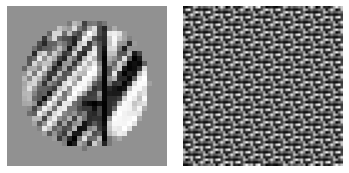

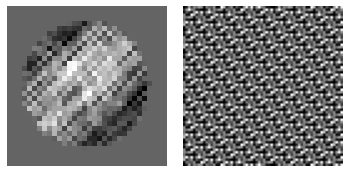

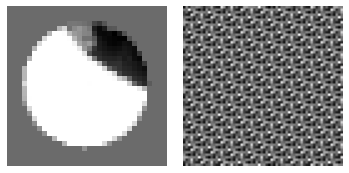

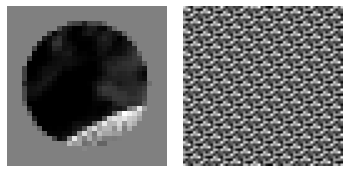

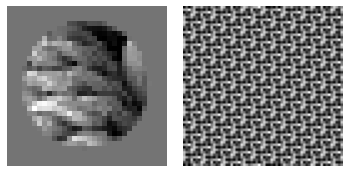

In [25]:
for _ in range(5):
    i = np.random.choice(range(270))
    matrix1 = X7[i]
    vector1 = y7[i]
    matrix2 = encode_img(matrix1, vector1)
    #matrix2 = avg_pool(matrix1)

    # Creating a figure with two subplots
    fig, axes = plt.subplots(1, 2)

    # Displaying the first matrix as an image in the first subplot
    axes[0].imshow(matrix1, cmap='gray')
    axes[0].axis('off')

    # Displaying the second matrix as an image in the second subplot
    axes[1].imshow(matrix2, cmap='gray')
    axes[1].axis('off')

    # Adjusting the spacing between subplots
    plt.subplots_adjust(wspace=0.1)

    # Showing the figure
    plt.show()

### Preparing the Encoded Images

In [19]:
# Subject 1: exp 1
X_train1_enc = encode_images(X_train1,y_train1)
X_test1_enc = encode_images(X_test1,y_test1)

# Subject 2: exp 2,3,4, 5, 6 and and 7
X_train2_enc = encode_images(X_train2,y_train2)
X_test2_enc = encode_images(X_test2,y_test2)
X_train3_enc = encode_images(X_train3,y_train3)
X_test3_enc = encode_images(X_test3,y_test3)
X_train4_enc = encode_images(X_train4,y_train4)
X_test4_enc = encode_images(X_test4,y_test4)
X_train5_enc = encode_images(X_train5,y_train5)
X_test5_enc = encode_images(X_test5,y_test5)
X_train6_enc = encode_images(X_train6,y_train6)
X_test6_enc = encode_images(X_test6,y_test6)
X_train7_enc = encode_images(X_train7,y_train7)
X_test7_enc = encode_images(X_test7,y_test7)

# Subject 3: exp 8,9 and 10

X_train8_enc = encode_images(X_train8, y_train8)
X_test8_enc = encode_images(X_test8, y_test8)
X_train9_enc = encode_images(X_train9, y_train9)
X_test9_enc = encode_images(X_test9, y_test9)
X_train10_enc = encode_images(X_train10, y_train10)
X_test10_enc = encode_images(X_test10, y_test10)

# General
X_train_enc = encode_images(X_train, y_train)
X_test_enc = encode_images(X_test, y_test)

In [20]:
# Don't run many times successively

# Subject 1
X_train1 = tf.expand_dims(X_train1, 3)
X_train1_enc = tf.expand_dims(X_train1_enc, 3)
X_test1 = tf.expand_dims(X_test1, 3)
X_test1_enc = tf.expand_dims(X_test1_enc, 3)

# Subject 2
X_train2 = tf.expand_dims(X_train2, 3)
X_train2_enc = tf.expand_dims(X_train2_enc, 3)
X_test2 = tf.expand_dims(X_test2, 3)
X_test2_enc = tf.expand_dims(X_test2_enc, 3)

X_train3 = tf.expand_dims(X_train3, 3)
X_train3_enc = tf.expand_dims(X_train3_enc, 3)
X_test3 = tf.expand_dims(X_test3, 3)
X_test3_enc = tf.expand_dims(X_test3_enc, 3)

X_train4 = tf.expand_dims(X_train4, 3)
X_train4_enc = tf.expand_dims(X_train4_enc, 3)
X_test4 = tf.expand_dims(X_test4, 3)
X_test4_enc = tf.expand_dims(X_test4_enc, 3)

X_train5 = tf.expand_dims(X_train5, 3)
X_train5_enc = tf.expand_dims(X_train5_enc, 3)
X_test5 = tf.expand_dims(X_test5, 3)
X_test5_enc = tf.expand_dims(X_test5_enc, 3)

X_train6 = tf.expand_dims(X_train6, 3)
X_train6_enc = tf.expand_dims(X_train6_enc, 3)
X_test6 = tf.expand_dims(X_test6, 3)
X_test6_enc = tf.expand_dims(X_test6_enc, 3)

X_train7 = tf.expand_dims(X_train7, 3)
X_train7_enc = tf.expand_dims(X_train7_enc, 3)
X_test7 = tf.expand_dims(X_test7, 3)
X_test7_enc = tf.expand_dims(X_test7_enc, 3)

# Subject 3

X_train8 = tf.expand_dims(X_train8, 3)
X_train8_enc = tf.expand_dims(X_train8_enc, 3)
X_test8 = tf.expand_dims(X_test8, 3)
X_test8_enc = tf.expand_dims(X_test8_enc, 3)

X_train9 = tf.expand_dims(X_train9, 3)
X_train9_enc = tf.expand_dims(X_train9_enc, 3)
X_test9 = tf.expand_dims(X_test9, 3)
X_test9_enc = tf.expand_dims(X_test9_enc, 3)

X_train10 = tf.expand_dims(X_train10, 3)
X_train10_enc = tf.expand_dims(X_train10_enc, 3)
X_test10 = tf.expand_dims(X_test10, 3)
X_test10_enc = tf.expand_dims(X_test10_enc, 3)

# General
X_train = tf.expand_dims(X_train, 3)
X_train_enc = tf.expand_dims(X_train_enc, 3)
X_test = tf.expand_dims(X_test, 3)
X_test_enc = tf.expand_dims(X_test_enc, 3)

### Building the Autoencoder

### Building the Encoder

In [21]:
encoder_inputs = keras.Input(shape=(32, 32, 1))  # (batch_size, 32 ,32 ,1)
x = layers.Conv2D(256, 4, activation='relu', padding='same', strides=2)(encoder_inputs) # (batch_size, 16 ,16 ,128)
x = layers.Conv2D(128, 4, activation='relu', padding='same', strides=2)(x) # (batch_size, 8 ,8 ,64)
x = layers.Conv2D(64, 4, activation='relu', padding='same', strides=2)(x)# (batch_size, 4 ,4 ,32)
#x = layers.Conv2D(32, 4, activation='relu', padding='same', strides=2)(x) # (batch_size, 2 ,2 ,16)

encoder = keras.Model(encoder_inputs, x, name="encoder")
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 16, 16, 256)    │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 128)      │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │       131,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 659,904 (2.52 MB)

 Trainable params: 659,904 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

### Building the Decoder

In [22]:
decoder_inputs = keras.Input(shape=(4, 4, 64))
#x = layers.Conv2DTranspose(32, kernel_size=4, strides=2, activation='relu', padding='same', kernel_initializer=initializer)(decoder_inputs) # (batch_size, 4 ,4 ,16)
x = layers.Conv2DTranspose(64, kernel_size=4, strides=2, activation='relu', padding='same')(decoder_inputs) # (batch_size, 8 ,8 ,32)
x = layers.Conv2DTranspose(128, kernel_size=4, strides=2, activation='relu', padding='same')(x) # (batch_size, 16 ,16 ,64)
x = layers.Conv2DTranspose(128, kernel_size=4, strides=2, activation='relu', padding='same')(x) # (batch_size, 32 ,32 ,128)
x = layers.Conv2DTranspose(256, kernel_size=4, strides=2, activation='relu', padding='same')(x) # (batch_size, 64 ,64 ,256)
decoder_outputs = layers.Conv2D(1, kernel_size=4, activation='sigmoid', padding='same')(x) # (batch_size, 32 ,32 ,1)

decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 64)       │        65,600 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 128)    │       131,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 64, 64, 256)    │       524,544 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 1)      │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 987,713 (3.77 MB)

 Trainable params: 987,713 (3.77 MB)

 Non-trainable params: 0 (0.00 B)

### Defining the Autoencoder as a `Model` with a custom `train_step`

In [ ]:
class Autoencoder(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )

    @property
    def metrics(self):
        return [
            self.reconstruction_loss_tracker
        ]

    def train_step(self, data):
        input, target = data
        with tf.GradientTape() as tape:
            encoded = self.encoder(input)
            reconstruction = self.decoder(encoded)
            reconstruction_loss = ops.mean(
                ops.sum(
                    keras.losses.binary_crossentropy(target, reconstruction),
                    axis=(1, 2),
                )
            )
        grads = tape.gradient(reconstruction_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        return {
            "reconstruction_loss": self.reconstruction_loss_tracker.result()
        }

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

### Compiling and Training the Model

In [ ]:
autoencoder = Autoencoder(encoder, decoder)
autoencoder.compile(optimizer=keras.optimizers.Adam(), loss='mse') #binary_crossentropy
autoencoder.fit(X_train, X_train_enc,
                epochs=50,
                #batch_size=6,
                validation_data=(X_test, X_test_enc))

## Testing the Autoencoder



### Plotting Input, Ground truth and Predicted Images

In [23]:
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15, 15))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

In [ ]:
for _ in range(5):
    index = np.random.choice(range(len(X_test)))
    generate_images(autoencoder, tf.expand_dims(X_test[index],0), tf.expand_dims(X_test_enc[index],0))

### Plotting Predicted vs Actual Activations

In [ ]:
m = y_test.shape[1]
c = X.shape[1]
pred_imgs = autoencoder(X_test).numpy().reshape(54,c,c)
x_test = X_test.numpy().reshape(54,c,c)
pred_vecs = decode_images(pred_imgs, x_test, m)
for _ in range(5):
    index = np.random.choice(range(m))
    y_preds = pred_vecs[:,index]
    plt.figure(figsize=(7,4))
    # Plotting the actual activations
    plt.plot(range(len(y_test)), y_test[:,index], label='Actual Activations')

    # Plotting the predicted activations
    plt.plot(range(len(y_preds)), y_preds, label='Predicted Activations')

    plt.xlabel('Image Number')
    plt.ylabel('Activation')
    plt.title('Model Predictions vs Actual Activations (Autoencoder) - Neuron {}'.format(index+1))
    plt.legend()

    plt.show()

In [ ]:
def compute_correlation(y_preds, y):
    corrs = []
    for i in range(y.shape[1]):
        corrs.append(np.corrcoef(y_preds[:,i], y[:,i])[0, 1])
    print("{} Neurons".format(len(corrs)))
    return np.nanmean(corrs)
correlation = compute_correlation(pred_vecs, y_test)
print("Correlation coefficient:", correlation)

355 Neurons
Correlation coefficient: 0.46864327972739656


### Using the Structural Similarity Index (SSIM) as Loss Function

In [24]:
class Autoencoder2(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.loss_tracker = metrics.Mean(name="loss")

    @property
    def metrics(self):
        return [self.loss_tracker]

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

    def ssim_loss(self, y_true, y_pred):
        return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0, filter_size=1))

    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            reconstructions = self(inputs)
            reconstruction_loss = self.ssim_loss(targets, reconstructions)
        grads = tape.gradient(reconstruction_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.loss_tracker.update_state(reconstruction_loss)
        return {"loss": self.loss_tracker.result()}

In [37]:
#encoder = keras.Model(encoder_inputs, x, name="encoder")
#decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")

encoder_inputs = keras.Input(shape=(32, 32, 1))  # (batch_size, 32 ,32 ,1)
x = layers.Conv2D(256, 4, activation='relu', padding='same', strides=2)(encoder_inputs) # (batch_size, 16 ,16 ,128)
x = layers.Conv2D(128, 4, activation='relu', padding='same', strides=2)(x) # (batch_size, 8 ,8 ,64)
x = layers.Conv2D(64, 4, activation='relu', padding='same', strides=2)(x)# (batch_size, 4 ,4 ,32)
x = layers.Conv2D(32, 4, activation='relu', padding='same', strides=2)(x) # (batch_size, 2 ,2 ,16)
encoder = keras.Model(encoder_inputs, x, name="encoder")

decoder_inputs = keras.Input(shape=(4, 4, 64))
x = layers.Conv2DTranspose(64, kernel_size=4, strides=2, activation='relu', padding='same')(decoder_inputs) # (batch_size, 8 ,8 ,32)
x = layers.Conv2DTranspose(128, kernel_size=4, strides=2, activation='relu', padding='same')(x) # (batch_size, 16 ,16 ,64)
x = layers.Conv2DTranspose(128, kernel_size=4, strides=2, activation='relu', padding='same')(x) # (batch_size, 32 ,32 ,128)
x = layers.Conv2DTranspose(256, kernel_size=4, strides=2, activation='relu', padding='same')(x) # (batch_size, 64 ,64 ,256)
decoder_outputs = layers.Conv2D(1, kernel_size=4, activation='sigmoid', padding='same')(x) # (batch_size, 32 ,32 ,1)
decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")

autoencoder2 = Autoencoder2(encoder, decoder)
autoencoder2.compile(optimizer='adam', loss=autoencoder2.ssim_loss)
autoencoder2.fit(X_train, X_train_enc,
                epochs=50,
                batch_size=1,
                validation_data=(X_test, X_test_enc))

Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0160 - val_loss: 0.0000e+00
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0040 - val_loss: 0.0000e+00
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0033 - val_loss: 0.0000e+00
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0032 - val_loss: 0.0000e+00
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0031 - val_loss: 0.0000e+00
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0030 - val_loss: 0.0000e+00
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0029 - val_loss: 0.0000e+00
Epoch 8/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0029 - val_loss: 0.0000e+00
Epoch 9/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0028 - val_loss: 0.0000e+00
Epoch 10/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0028 - val_loss: 0.0000e+00
Epoch 11/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0027 - val_loss: 0.0000e+00
Epoch 12

In [ ]:
autoencoder2 = Autoencoder2(encoder, decoder)
autoencoder2.load_weights("autoencoder_weights_corr_0.50.355neurons.weights.h5")

In [ ]:
for _ in range(5):
    index = np.random.choice(range(len(X_test)))
    generate_images(autoencoder2, tf.expand_dims(X_test[index],0), tf.expand_dims(X_test_enc[index],0))

In [ ]:
m = y_test1.shape[1]
c = X1.shape[1]
pred_imgs = autoencoder2(X_test1).numpy().reshape(54,c,c)
x_test1 = X_test1.numpy().reshape(54,c,c)
pred_vecs = decode_images(pred_imgs, x_test, m)
for _ in range(5):
    index = np.random.choice(range(m))
    y_preds = pred_vecs[:,index]
    plt.figure(figsize=(7,4))
    # Plotting the actual activations
    plt.plot(range(len(y_test)), y_test1[:,index], label='Actual Firing Rates')

    # Plotting the predicted activations
    plt.plot(range(len(y_preds)), y_preds, label='Predicted Firing Rates')

    plt.xlabel('Image N°')
    plt.ylabel('Activation')
    plt.title('Model Predictions vs Actual Activations (Autoencoder) - Neuron {}'.format(index+1))
    plt.legend()

    plt.show()

In [38]:
def compute_correlation(y_preds, y):
    corrs = []
    for i in range(y.shape[1]):
        corrs.append(np.corrcoef(y_preds[:,i], y[:,i])[0, 1])
    print("{} Neurons".format(len(corrs)))
    return np.nanmean(corrs)
m = y_test10.shape[1]
c = X10.shape[1]
pred_imgs = autoencoder2(X_test10).numpy().reshape(54,c,c)
x_test = X_test10_enc.numpy().reshape(54,c,c)
pred_vecs = decode_images(pred_imgs, x_test, m)
correlation = compute_correlation(pred_vecs, y_test10)
print("Correlation coefficient:", correlation)

76 Neurons
Correlation coefficient: 0.17250055086147648


### Testing the Autoencoder on Different Datasets

In [ ]:
X_test3.shape

TensorShape([54, 32, 32, 1])

In [ ]:
for _ in range(5):
    index = np.random.choice(range(len(X_test3)))
    generate_images(autoencoder2, tf.expand_dims(X_test3[index],0), tf.expand_dims(X_test3_enc[index],0))

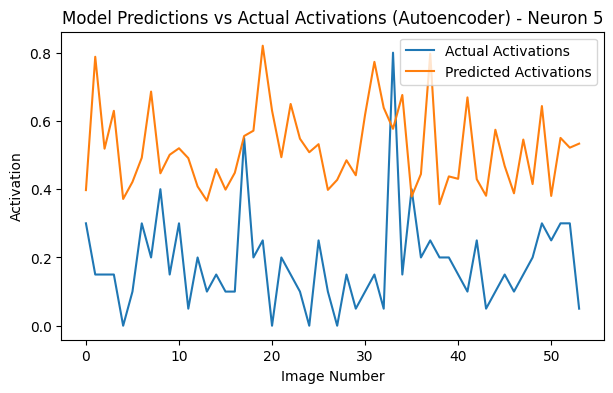

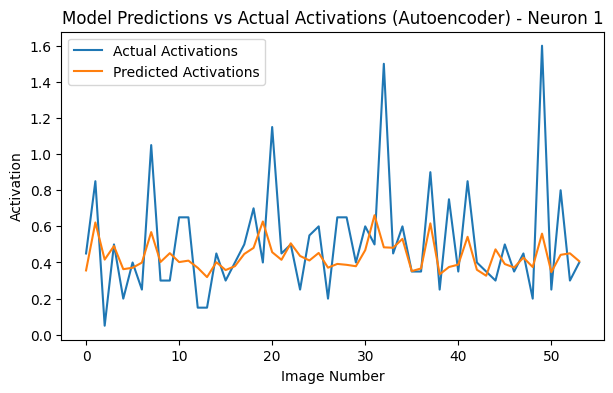

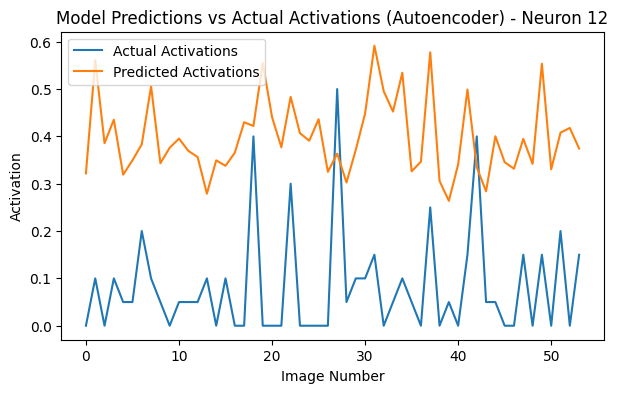

In [ ]:
m = y_test3.shape[1]
c = X3.shape[1]
pred_imgs3 = autoencoder2(X_test3).numpy().reshape(54,c,c)
x_test3 = X_test3.numpy().reshape(54,c,c)
pred_vecs3 = decode_images(pred_imgs3, x_test3, m)
for _ in range(3):
    index = np.random.choice(range(m))
    y_preds3 = pred_vecs3[:,index]
    plt.figure(figsize=(7,4))
    # Plotting the actual activations
    plt.plot(range(len(y_test3)), y_test3[:,index], label='Actual Activations')

    # Plotting the predicted activations
    plt.plot(range(len(y_preds3)), y_preds3, label='Predicted Activations')

    plt.xlabel('Image Number')
    plt.ylabel('Activation')
    plt.title('Model Predictions vs Actual Activations (Autoencoder) - Neuron {}'.format(index+1))
    plt.legend()

    plt.show()

In [ ]:
def compute_correlation(y_preds, y):
    corrs = []
    for i in range(y.shape[1]):
        corrs.append(np.corrcoef(y_preds[:,i], y[:,i])[0, 1])
    print(len(corrs))
    return np.nanmean(corrs)
correlation = compute_correlation(pred_vecs3, y_test3)
print("Correlation coefficient:", correlation)

34
Correlation coefficient: 0.32739822262628204


In [ ]:
for _ in range(5):
    index = np.random.choice(range(len(X_test10)))
    generate_images(autoencoder2, tf.expand_dims(X_test10[index],0), tf.expand_dims(X_test10_enc[index],0))

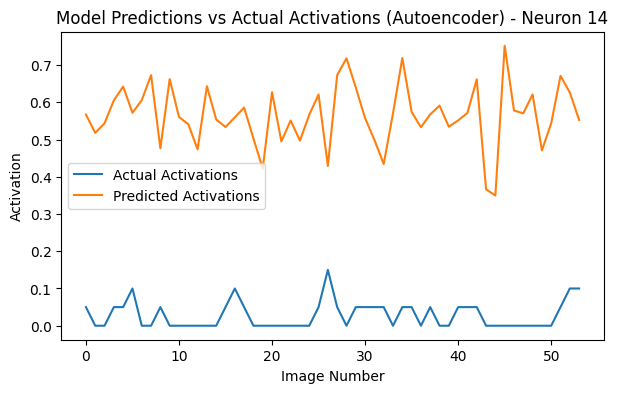

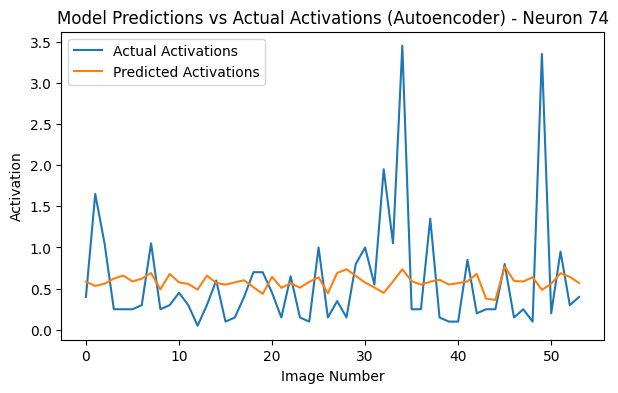

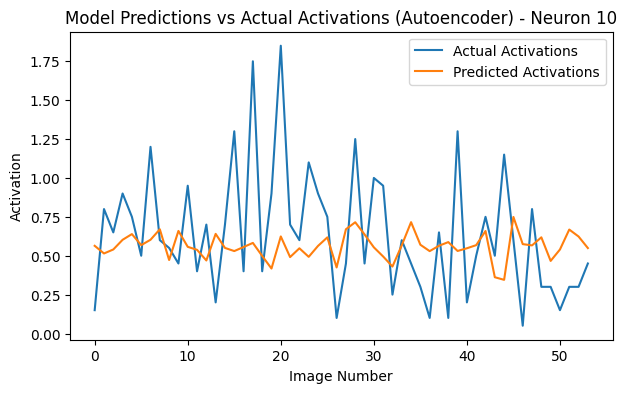

In [ ]:
m = y_test10.shape[1]
c = X10.shape[1]
pred_imgs10 = autoencoder2(X_test10).numpy().reshape(54,c,c)
x_test10 = X_test10.numpy().reshape(54,c,c)
pred_vecs10 = decode_images(pred_imgs10, x_test10, m)
for _ in range(3):
    index = np.random.choice(range(m))
    y_preds10 = pred_vecs10[:,index]
    plt.figure(figsize=(7,4))
    # Plotting the actual activations
    plt.plot(range(len(y_test10)), y_test10[:,index], label='Actual Activations')

    # Plotting the predicted activations
    plt.plot(range(len(y_preds10)), y_preds10, label='Predicted Activations')

    plt.xlabel('Image Number')
    plt.ylabel('Activation')
    plt.title('Model Predictions vs Actual Activations (Autoencoder) - Neuron {}'.format(index+1))
    plt.legend()

    plt.show()

In [ ]:
def compute_correlation(y_preds, y):
    corrs = []
    for i in range(y.shape[1]):
        corrs.append(np.corrcoef(y_preds[:,i], y[:,i])[0, 1])
    print(len(corrs))
    return np.nanmean(corrs)
correlation = compute_correlation(pred_vecs10, y_test10)
print("Correlation coefficient:", correlation)

76
Correlation coefficient: -0.034942415682654285


## Implementing MAML Using the Autoencoder Model

The advantage of using this autoencoder model over a CNN is that it adapts to any experimental session, as its architecture does not depend on the number of neurons whose activations are to be predicted.

What we consider as a task is the prediction of the neural activity in an experimental session. Therefore, each task consists of inputs (images) and outputs (encoded images) pairs. The flexibility of this method allows us to treat groups of sessions and subject exactly in the same way.

### Task Classes

In [21]:
class Train_Task:
    def __init__(self, x_train, x_train_enc, x_test, x_test_enc, y_train, y_test, batch_size=9):
        self.x_train = x_train
        self.x_train_enc = x_train_enc
        self.x_test = x_test
        self.x_test_enc = x_test_enc
        self.y_train = y_train
        self.y_test = y_test
        self.batch_size = batch_size

    def train_batch(self):
        indices = tf.random.shuffle(tf.range(len(self.x_train)))
        batch_indices = indices[:self.batch_size]
        batch_x = tf.gather(self.x_train, batch_indices)
        batch_x_enc = tf.gather(self.x_train_enc, batch_indices)
        batch_y = tf.gather(self.y_train, batch_indices)

        #batch_x = self.x_train[:self.batch_size]
        #batch_x_enc = self.x_train_enc[:self.batch_size]
        #batch_y = self.y_train[:self.batch_size]
        #return tf.expand_dims(batch_x, axis=3), tf.expand_dims(batch_x_enc, axis=3)
        return tf.expand_dims(self.x_train, axis=3), tf.expand_dims(self.x_train_enc, axis=3)

    def test_batch(self):
        indices = tf.random.shuffle(tf.range(len(self.x_test)))
        batch_indices = indices[:self.batch_size]
        batch_x = tf.gather(self.x_test, batch_indices)
        batch_x_enc = tf.gather(self.x_test_enc, batch_indices)
        batch_y = tf.gather(self.y_test, batch_indices)

        #batch_x = self.x_test[:self.batch_size]
        #batch_x_enc = self.x_test_enc[:self.batch_size]
        #batch_y = self.y_test[:self.batch_size]
        #return tf.expand_dims(batch_x, axis=3), tf.expand_dims(batch_x_enc, axis=3)
        return tf.expand_dims(self.x_test, axis=3), tf.expand_dims(self.x_test_enc, axis=3)

class Test_Task:
    def __init__(self, x_ft, x_ft_enc, x_test, x_test_enc, y_ft, y_test):
        self.x_ft = tf.expand_dims(x_ft, axis=3)
        self.x_ft_enc = tf.expand_dims(x_ft_enc, axis=3)
        self.x_test = tf.expand_dims(x_test, axis=3)
        self.x_test_enc = tf.expand_dims(x_test_enc, axis=3)
        self.y_ft = y_ft
        self.y_test = y_test

### Meta-Model Class

In [22]:
class V1_Predictor(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.reconstruction_loss_tracker = metrics.Mean(name="reconstruction_loss")

    @property
    def metrics(self):
        return [self.reconstruction_loss_tracker]

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

    def ssim_loss(self, y_true, y_pred):
        return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0, filter_size=1))

    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            reconstructions = self(inputs)
            reconstruction_loss = self.ssim_loss(targets, reconstructions)
        grads = tape.gradient(reconstruction_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        return self.reconstruction_loss_tracker.result()

### Useful Functions

In [23]:
def copy_model1(model):
    copied_model = V1_Predictor(encoder,decoder)
    init  = tf.constant(1.0, shape=(1,32,32,1))
    copied_model(init)
    copied_model.encoder.set_weights(model.encoder.get_weights())
    copied_model.decoder.set_weights(model.decoder.get_weights())
    return copied_model

def copy_model2(model, x):

    copied_model = V1_Predictor(encoder,decoder)
    copied_model(x)
    copied_model.encoder.set_weights(model.encoder.get_weights())
    copied_model.decoder.set_weights(model.decoder.get_weights())
    return copied_model

def copy_model3(model, x):

    copied_model = V1_Predictor(encoder,decoder)
    copied_model(x)
    copied_model.encoder.set_weights(model.encoder.get_weights())
    copied_model.decoder.set_weights(model.decoder.get_weights())

    return copied_model

In [24]:
def create_train_task(data_dict):
    X = data_dict["images"][:, 1:, 1:]/255.0
    y = data_dict["activity"]
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

    X_train_enc = encode_images(X_train, y_train)
    X_test_enc = encode_images(X_test, y_test)

    train_task = Train_Task(X_train, X_train_enc, X_test, X_test_enc, y_train, y_test)
    return train_task

def create_test_task(data_dict, bs=10):
    X = data_dict["images"][:, 1:, 1:]/255.0
    y = data_dict["activity"]
    # Generate shuffled indices
    shuffled_indices = np.random.permutation(len(X))

    # Shuffle both X and y using the shuffled indices
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    #X = X_shuffled
    #y = y_shuffled
    x_ft = X[:bs]
    y_ft = y[:bs]
    x_ft_enc = encode_images(x_ft, y_ft)
    x_test = X[bs:]
    y_test = y[bs:]
    x_test_enc = encode_images(x_test, y_test)

    test_task = Test_Task(x_ft, x_ft_enc, x_test, x_test_enc, y_ft, y_test)
    return test_task

data_dics = [data1, data2, data3, data4, data5, data6, data7, data8, data9]
training_set = [create_train_task(data_dic) for data_dic in data_dics]
test_task = create_test_task(data10)

In [25]:
def compute_loss(model, x, y):
    logits = model(x)
    y_true = tf.cast(y, tf.float64)
    y_pred = tf.cast(logits, tf.float64)
    loss = model.ssim_loss(y_true, y_pred)
    return loss

In [ ]:
training_set[0].train_batch()[0].shape

TensorShape([10, 32, 32, 1])

### MAML Training Function

In [26]:
def maml_train(model, dataset, epochs, num_inner_steps, inner_lr=0.0001):
    losses = []  # List to store the losses for plotting

    # Best values: inner_lr=0.0001 and outer_lr =0.001
    outer_lr = 0.0005

    meta_optimizer = tf.keras.optimizers.Adam(outer_lr)
    # Meta-training loop
    init  = tf.constant(1.0, shape=(1,32,32,1))
    model(init) # Step 1
    for epoch in range(epochs): # Step 2
        meta_losses = []  # List to store the meta-losses for the current meta-iteration
        test_batches = []
        test_models = []
        # Iterate over training tasks

        # Initialize the sum of test losses
        sum_test_losses = 0.0
        for task in dataset: # Steps 3 and 4

            # Create a copy of the meta-model for the inner loop
            inner_model = copy_model1(model)
            # Sample a batch of data from the task
            x_train, x_train_enc = task.train_batch() # Step 5
            # Inner loop: Adaptation on the task
            for _ in range(num_inner_steps):
                #
                # Compute the loss on the batch
                with tf.GradientTape() as inner_tape:
                    train_loss = compute_loss(inner_model, x_train, x_train_enc)
                # Updating the weights according to the gradient of the inner loss
                inner_optimizer = tf.keras.optimizers.Adam()
                inner_gradients = inner_tape.gradient(train_loss, inner_model.trainable_variables) # Step 6
                inner_optimizer.apply_gradients(zip(inner_gradients, inner_model.trainable_variables)) # Step 7
            x_test, x_test_enc = task.test_batch() # Step 8
            with tf.GradientTape() as meta_tape:
                test_loss = compute_loss(inner_model, x_test, x_test_enc)
                # Accumulate test loss
                sum_test_losses += test_loss
            # Step 9

            # Compute the gradients for the meta-model update
            meta_gradients = meta_tape.gradient(sum_test_losses, inner_model.trainable_variables)

            # Apply the meta-gradients to update the meta-model
            meta_optimizer.apply_gradients(zip(meta_gradients, model.trainable_variables)) # Step 10
            meta_losses.append(test_loss)

        # Calculate the mean loss for the meta-iteration
        mean_loss = tf.reduce_mean(meta_losses)
        losses.append(mean_loss)
        print("Iteration {} - Loss: {:.5f}".format(epoch+1, losses[-1].numpy()))
        #Early stopping, patience = 3 epochs
        if len(losses) > 3:
          if all(losses[-1] >= loss for loss in losses[-4:-1]):
              print("No improvement in 3 epochs, stopping training.")
              break

    return losses

In [ ]:
training_set[0].train_batch()[0].shape

TensorShape([216, 32, 32, 1])

Iteration 1 - Loss: 0.01631
Iteration 2 - Loss: 0.01530
Iteration 3 - Loss: 0.01351
Iteration 4 - Loss: 0.01243
Iteration 5 - Loss: 0.01168
Iteration 6 - Loss: 0.01094
Iteration 7 - Loss: 0.00989
Iteration 8 - Loss: 0.00864
Iteration 9 - Loss: 0.00652
Iteration 10 - Loss: 0.00629
Iteration 11 - Loss: 0.00609
Iteration 12 - Loss: 0.00589
Iteration 13 - Loss: 0.00575
Iteration 14 - Loss: 0.00567
Iteration 15 - Loss: 0.00558
Iteration 16 - Loss: 0.00552
Iteration 17 - Loss: 0.00562
Iteration 18 - Loss: 0.00560
Iteration 19 - Loss: 0.00548
Iteration 20 - Loss: 0.00544
Iteration 21 - Loss: 0.00541
Iteration 22 - Loss: 0.00538
Iteration 23 - Loss: 0.00535
Iteration 24 - Loss: 0.00537
Iteration 25 - Loss: 0.00529
Iteration 26 - Loss: 0.00525
Iteration 27 - Loss: 0.00525
Iteration 28 - Loss: 0.00517
Iteration 29 - Loss: 0.00518
Iteration 30 - Loss: 0.00509
Iteration 31 - Loss: 0.00510
Iteration 32 - Loss: 0.00505
Iteration 33 - Loss: 0.00501
Iteration 34 - Loss: 0.00496
Iteration 35 - Loss: 0.

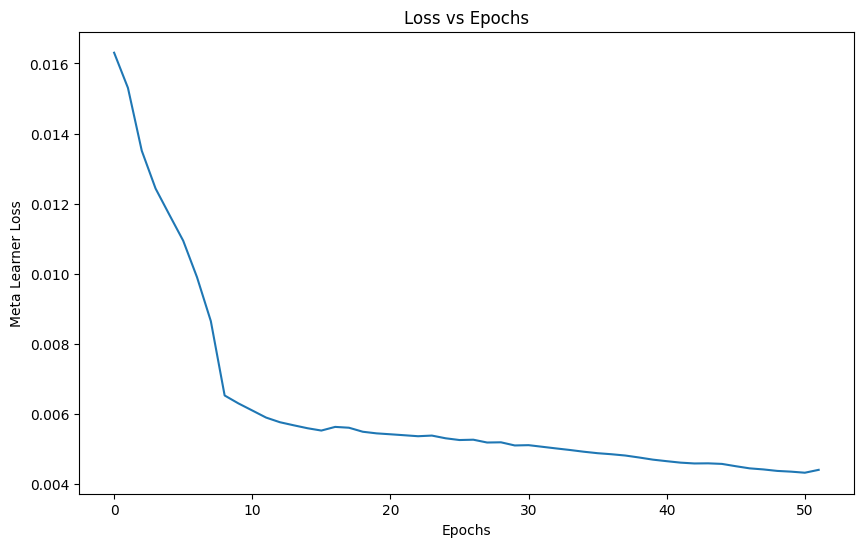

In [27]:
encoder_inputs = keras.Input(shape=(32, 32, 1))  # (batch_size, 32 ,32 ,1)
x = layers.Conv2D(256, 4, activation='relu', padding='same', strides=2)(encoder_inputs) # (batch_size, 16 ,16 ,128)
x = layers.Conv2D(128, 4, activation='relu', padding='same', strides=2)(x) # (batch_size, 8 ,8 ,64)
x = layers.Conv2D(64, 4, activation='relu', padding='same', strides=2)(x)# (batch_size, 4 ,4 ,32)
#x = layers.Conv2D(32, 4, activation='relu', padding='same', strides=2)(x) # (batch_size, 2 ,2 ,16)
encoder = keras.Model(encoder_inputs, x, name="encoder")

decoder_inputs = keras.Input(shape=(4, 4, 64))
#x = layers.Conv2DTranspose(32, kernel_size=4, strides=2, activation='relu', padding='same', kernel_initializer=initializer)(decoder_inputs) # (batch_size, 4 ,4 ,16)
x = layers.Conv2DTranspose(64, kernel_size=4, strides=2, activation='relu', padding='same')(decoder_inputs) # (batch_size, 8 ,8 ,32)
x = layers.Conv2DTranspose(128, kernel_size=4, strides=2, activation='relu', padding='same')(x) # (batch_size, 16 ,16 ,64)
x = layers.Conv2DTranspose(256, kernel_size=4, strides=2, activation='relu', padding='same')(x) # (batch_size, 32 ,32 ,128)
decoder_outputs = layers.Conv2D(1, kernel_size=4, activation='sigmoid', padding='same')(x) # (batch_size, 32 ,32 ,1)
decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")


maml = V1_Predictor(encoder,decoder)
Losses = maml_train(maml, training_set, epochs=60, num_inner_steps=10)
#losses = maml_train(maml, 2, training_set2)
plt.figure(figsize=(10,6))
plt.xlabel('Epochs')
plt.ylabel('Meta Learner Loss')
plt.title('Loss vs Epochs')
plt.plot(Losses)
plt.show()

In [28]:
Losses[-1]

<tf.Tensor: shape=(), dtype=float32, numpy=0.004393995>

### Testing the MAML Model

In [41]:
def test_maml(meta_model, test_task):

    # Inner loop: Adaptation on the test task
    num_inner_steps = 10
    optimizer = tf.keras.optimizers.Adam(0.0001)
    # Sample a batch of data from the test task
    test_model = copy_model1(meta_model)
    x_ft, x_ft_enc = test_task.x_ft, test_task.x_ft_enc

    # Freezing the decoder layers
    #for layer in meta_model.decoder.layers:
        #layer.trainable = False

    for _ in range(num_inner_steps):

        # Compute the loss on the batch
        with tf.GradientTape() as inner_tape:
            inner_loss = compute_loss(test_model, x_ft, x_ft_enc)
        inner_gradients = inner_tape.gradient(inner_loss, test_model.trainable_variables)

        # Update the model parameters
        optimizer.apply_gradients(zip(inner_gradients, test_model.trainable_variables))

    # Evaluate the adapted model on the test set of the task
    x_test, x_test_enc = test_task.x_test, test_task.x_test_enc
    test_loss = compute_loss(test_model, x_test, x_test_enc)

    # Print or return the evaluation results
    print("Test Loss:", tf.reduce_mean(test_loss).numpy())
    return test_model

# Test the trained MAML model on the new task
test_model = test_maml(maml, test_task)

ValueError: You called `set_weights(weights)` on layer 'encoder' with a weight list of length 6, but the layer was expecting 8 weights.

In [ ]:
test_model.compile(optimizer='adam', loss=test_model.ssim_loss)
test_model.fit((test_task.x_ft, test_task.x_ft_enc),
               epochs= 15,
               batch_size=1)

In [39]:
#autoencoder2.compile(optimizer='adam', loss=test_model.ssim_loss)
autoencoder2.fit(test_task.x_ft, test_task.x_ft_enc,
               epochs= 10,
               batch_size=1)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044


### Plotting Actual vs Predicted Activations

In [ ]:
m = test_task.y_test.shape[1]
c = test_task.x_test.shape[1]
n = test_task.x_test.shape[0]
pred_imgs = test_model(test_task.x_test).numpy().reshape(n,c,c)
x_test = test_task.x_test.numpy().reshape(n,c,c)
pred_vecs = decode_images(pred_imgs, x_test, m)
for _ in range(5):
    index = np.random.choice(range(m))
    y_preds = pred_vecs[:,index]
    plt.figure(figsize=(7,4))
    # Plotting the actual activations
    plt.plot(range(60), test_task.y_test[:60 ,index], label='Actual Firing Rates')

    # Plotting the predicted activations
    plt.plot(range(60), y_preds[:60], label='Predicted Firing Rates')

    plt.xlabel('Image N°')
    plt.ylabel('Firing Rate ($s^{-1}$)')
    plt.title('Actual vs Predicted Firing Rates')
    plt.legend()

    plt.show()

### Correlation

In [40]:
def compute_correlation(y_preds, y):
    corrs = []
    for i in range(y.shape[1]):
        corrs.append(np.corrcoef(y_preds[:,i], y[:,i])[0, 1])
    print(y.shape[1], "Neurons")
    return np.nanmean(corrs)

m = test_task.y_test.shape[1]
c = test_task.x_test.shape[1]
n = test_task.x_test.shape[0]
pred_imgs1 = maml(test_task.x_test).numpy().reshape(n,c,c)
x_test = test_task.x_test.numpy().reshape(n,c,c)
pred_vecs1 = decode_images(pred_imgs1, x_test, m)

pred_imgs2 = autoencoder2(test_task.x_test).numpy().reshape(n,c,c)
pred_vecs2 = decode_images(pred_imgs2, x_test, m)

correlation1 = compute_correlation(pred_vecs1, test_task.y_test)
correlation2 = compute_correlation(pred_vecs2, test_task.y_test)

print("Meta: {}, Classic: {}".format(correlation1, correlation2))

76 Neurons
76 Neurons
Meta: 0.2880511521195534, Classic: 0.26016732684149463


## Predicting V1 Neural Responses Across Experimental Subjects

### Data Preparation

In [ ]:
def create_train_task(data_dict):
    X = data_dict["images"][:, 1:, 1:]/255.0
    y = data_dict["activity"]
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

    X_train_enc = encode_images(X_train, y_train)
    X_test_enc = encode_images(X_test, y_test)

    train_task = Train_Task(X_train, X_train_enc, X_test, X_test_enc, y_train, y_test)
    return train_task

def create_test_task(data_dict, bs=10):
    X = data_dict["images"][:, 1:, 1:]/255.0
    y = data_dict["activity"]
    # Generate shuffled indices
    shuffled_indices = np.random.permutation(len(X))

    # Shuffle both X and y using the shuffled indices
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    #X = X_shuffled
    #y = y_shuffled
    x_ft = X[:bs]
    y_ft = y[:bs]
    x_ft_enc = encode_images(x_ft, y_ft)
    x_test = X[bs:]
    y_test = y[bs:]
    x_test_enc = encode_images(x_test, y_test)

    test_task = Test_Task(x_ft, x_ft_enc, x_test, x_test_enc, y_ft, y_test)
    return test_task

data_dics = [data1, concat([data2, data3, data4, data5, data6, data7])]
training_set = [create_train_task(data_dic) for data_dic in data_dics]
test_task = create_test_task(concat([data8, data9, data10]))

### MAML Training

In [ ]:
encoder_inputs = keras.Input(shape=(32, 32, 1))  # (batch_size, 32 ,32 ,1)
x = layers.Conv2D(256, 4, activation='relu', padding='same', strides=2)(encoder_inputs) # (batch_size, 16 ,16 ,128)
x = layers.Conv2D(128, 4, activation='relu', padding='same', strides=2)(x) # (batch_size, 8 ,8 ,64)
x = layers.Conv2D(64, 4, activation='relu', padding='same', strides=2)(x)# (batch_size, 4 ,4 ,32)
#x = layers.Conv2D(32, 4, activation='relu', padding='same', strides=2)(x) # (batch_size, 2 ,2 ,16)
encoder = keras.Model(encoder_inputs, x, name="encoder")

decoder_inputs = keras.Input(shape=(4, 4, 64))
#x = layers.Conv2DTranspose(32, kernel_size=4, strides=2, activation='relu', padding='same', kernel_initializer=initializer)(decoder_inputs) # (batch_size, 4 ,4 ,16)
x = layers.Conv2DTranspose(64, kernel_size=4, strides=2, activation='relu', padding='same')(decoder_inputs) # (batch_size, 8 ,8 ,32)
x = layers.Conv2DTranspose(128, kernel_size=4, strides=2, activation='relu', padding='same')(x) # (batch_size, 16 ,16 ,64)
x = layers.Conv2DTranspose(256, kernel_size=4, strides=2, activation='relu', padding='same')(x) # (batch_size, 32 ,32 ,128)
decoder_outputs = layers.Conv2D(1, kernel_size=4, activation='sigmoid', padding='same')(x) # (batch_size, 32 ,32 ,1)
decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")


maml = V1_Predictor(encoder,decoder)
Losses = maml_train(maml, training_set, epochs=60, num_inner_steps=10)
#losses = maml_train(maml, 2, training_set2)
plt.figure(figsize=(10,6))
plt.xlabel('Epochs')
plt.ylabel('Meta Learner Loss')
plt.title('Loss vs Epochs')
plt.plot(Losses)
plt.show()

### MAML Testing

In [ ]:
def test_maml(meta_model, test_task):

    # Inner loop: Adaptation on the test task
    num_inner_steps = 10
    optimizer = tf.keras.optimizers.Adam(0.0001)
    # Sample a batch of data from the test task
    test_model = copy_model1(meta_model)
    x_ft, x_ft_enc = test_task.x_ft, test_task.x_ft_enc

    # Freezing the decoder layers
    #for layer in meta_model.decoder.layers:
        #layer.trainable = False

    for _ in range(num_inner_steps):

        # Compute the loss on the batch
        with tf.GradientTape() as inner_tape:
            inner_loss = compute_loss(test_model, x_ft, x_ft_enc)
        inner_gradients = inner_tape.gradient(inner_loss, test_model.trainable_variables)

        # Update the model parameters
        optimizer.apply_gradients(zip(inner_gradients, test_model.trainable_variables))

    # Evaluate the adapted model on the test set of the task
    x_test, x_test_enc = test_task.x_test, test_task.x_test_enc
    test_loss = compute_loss(test_model, x_test, x_test_enc)

    # Print or return the evaluation results
    print("Test Loss:", tf.reduce_mean(test_loss).numpy())
    return test_model

# Test the trained MAML model on the new task
test_model = test_maml(maml, test_task)

In [ ]:
#autoencoder2.compile(optimizer='adam', loss=test_model.ssim_loss)
autoencoder2.fit(test_task.x_ft, test_task.x_ft_enc,
               epochs= 10,
               batch_size=1)

### Correlation

In [ ]:
def compute_correlation(y_preds, y):
    corrs = []
    for i in range(y.shape[1]):
        corrs.append(np.corrcoef(y_preds[:,i], y[:,i])[0, 1])
    print(y.shape[1], "Neurons")
    return np.nanmean(corrs)

m = test_task.y_test.shape[1]
c = test_task.x_test.shape[1]
n = test_task.x_test.shape[0]
pred_imgs1 = maml(test_task.x_test).numpy().reshape(n,c,c)
x_test = test_task.x_test.numpy().reshape(n,c,c)
pred_vecs1 = decode_images(pred_imgs1, x_test, m)

pred_imgs2 = autoencoder2(test_task.x_test).numpy().reshape(n,c,c)
pred_vecs2 = decode_images(pred_imgs2, x_test, m)

correlation1 = compute_correlation(pred_vecs1, test_task.y_test)
correlation2 = compute_correlation(pred_vecs2, test_task.y_test)

print("Meta: {}, Classic: {}".format(correlation1, correlation2))